<a href="https://colab.research.google.com/github/martinpdab/tugasscdl/blob/main/Skenario1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install sklearn

In [6]:
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [7]:
#memakai dataset
URL = 'https://raw.githubusercontent.com/martinpdab/tugasscdl/main/dataset_fixed(1).csv' 
dataframe = pd.read_csv(URL)
dataframe

,TE,HU,RF,WS,PD,ABJ,LAG0,LAG1,LAG2,LAG3,LAG4,LAG5,LAG6,LAG7,LAG8,LAG9,LAG10,LAG11,LAG12,OS
0,26.02,84.74,10.52,0.84,792.86,86.96,1,4,6,4,4,1,4,3,3,5,2,1,4,0
1,26.32,84.64,12.04,0.86,793.45,86.72,3,1,4,6,4,4,1,4,3,3,5,2,1,1
2,26.39,85.00,8.65,0.55,794.04,86.50,0,3,1,4,6,4,4,1,4,3,3,5,2,0
3,26.29,86.17,10.37,0.30,794.63,86.28,1,0,3,1,4,6,4,4,1,4,3,3,5,0
4,26.57,85.61,7.35,0.58,795.22,86.08,0,1,0,3,1,4,6,4,4,1,4,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,24.27,76.87,0.00,1.39,846.18,96.29,1,4,3,3,5,2,1,4,1,1,1,2,3,0
85,25.50,75.73,0.59,1.03,846.59,93.34,4,1,4,3,3,5,2,1,4,1,1,1,2,1
86,26.58,74.94,0.04,1.39,847.01,96.10,4,4,1,4,3,3,5,2,1,4,1,1,1,1
87,26.49,82.28,10.53,1.00,847.42,96.38,6,4,4,1,4,3,3,5,2,1,4,1,1,1


In [8]:
# mengambil kolom TE, HU, RF, WS, PD, ABJ, OS dan mengacak dataset
data = dataframe[['TE', 'HU', 'RF', 'WS', 'PD', 'ABJ', 'OS']]
data = shuffle(data)
data.head()

,TE,HU,RF,WS,PD,ABJ,OS
54,26.06,85.65,12.59,0.42,826.48,92.12,0
84,24.27,76.87,0.00,1.39,846.18,96.29,0
46,25.91,85.26,10.47,0.61,820.33,94.70,0
74,26.43,81.10,4.81,1.06,842.00,84.00,0
78,25.39,86.00,13.44,0.71,843.70,92.87,0


In [9]:
#train-test split 80-20
train, test = train_test_split(data, test_size=0.2)
print(len(train), 'banyak data train')
print(len(test), 'banyak data test')

#train-test split 70-30
train1, test1 = train_test_split(data, test_size=0.3)
print(len(train1), 'banyak data train')
print(len(test1), 'banyak data test')

71 banyak data train
18 banyak data test
62 banyak data train
27 banyak data test


In [10]:
#misahin label
def df_to_dataset(data, batch_size=32):
  data = data.copy()
  labels = data.pop('OS')
  ds = tf.data.Dataset.from_tensor_slices((dict(data), labels))
  ds = ds.batch(batch_size)
  return ds

In [11]:
batch_size = 64 # A small batch sized is used for demonstration purposes
#80-20 split
train_ds = df_to_dataset(train, batch_size=batch_size)
test_ds = df_to_dataset(test, batch_size=batch_size)

#70-30 split
train_ds1 = df_to_dataset(train1, batch_size=batch_size)
test_ds1 = df_to_dataset(test1, batch_size=batch_size)

In [12]:
for feature_batch, label_batch in train_ds.take(1):
  print('Every feature:', list(feature_batch.keys()))
  print('TE:', feature_batch['TE'])
  print('HU:', feature_batch['HU'])
  print('OS:', label_batch)

Every feature: ['TE', 'HU', 'RF', 'WS', 'PD', 'ABJ']
TE: tf.Tensor(
[26.04 25.88 26.   24.13 25.9  24.45 26.   27.4  24.79 26.64 24.64 25.91
 26.13 26.09 24.46 25.63 23.85 26.58 26.   26.08 23.67 25.73 25.96 25.82
 26.49 25.83 24.86 26.22 25.6  26.11 24.27 25.51 24.55 26.06 26.57 23.94
 26.43 25.69 24.25 26.76 25.8  26.32 25.28 26.73 26.78 25.39 25.35 25.7
 25.91 25.79 25.03 26.14 26.35 25.15 26.39 26.3  26.09 24.83 25.7  25.62
 23.86 26.73 26.28 25.76], shape=(64,), dtype=float64)
HU: tf.Tensor(
[84.81 85.14 84.53 79.73 85.2  79.42 84.52 76.61 84.39 76.52 78.81 85.2
 85.14 84.42 82.06 85.4  76.84 74.94 84.13 85.48 80.61 83.93 78.94 82.9
 82.28 83.39 78.61 84.03 77.8  81.93 76.87 81.5  78.78 85.65 85.61 78.45
 81.1  86.86 78.65 81.06 86.77 84.64 87.29 81.17 85.45 86.   83.52 82.68
 80.77 84.83 77.53 85.45 85.3  76.7  85.   74.55 86.6  81.   82.71 84.1
 75.13 82.17 83.53 81.57], shape=(64,), dtype=float64)
OS: tf.Tensor(
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0

In [13]:
feature_columns = []

for header in ['TE', 'HU', 'RF', 'WS', 'PD', 'ABJ']:
  feature_columns.append(feature_column.numeric_column(header))

In [14]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)
feature_layer

In [15]:
#train 80-20
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history= model.fit(train_ds,
          validation_data=test_ds,
          epochs=75)

Epoch 1/75
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
1/2 [==============>...............] - ETA: 0s - loss: 7.3655 - accuracy: 0.7812WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'TE': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=float64>, 'HU': <tf.Tensor 'ExpandDims_1:0' shape=(None, 1) dtype=float64>, 'RF': <tf.Tensor 'ExpandDims_3:0' shape=(None, 1) dtype=float64>, 'WS': <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) dtype=float64>, 'PD': <tf.Tensor 'ExpandDims_2:0' shape=(None, 1) dtype=float64>, 'ABJ': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=float64>}
Consider rewriting this model with the Functional API.
2/2 [==============================] - 1s 188ms/step - loss: 6.7643 - accuracy: 0.7887 - val_loss: 8.4231 - val_accuracy: 0.1667
Epoch 2/75
2/2 [==============================] - 0s 27ms/step - loss: 7.4172 - accuracy: 0.

In [16]:
#train 70-30
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history2= model.fit(train_ds1,
          validation_data=test_ds1,
          epochs=75)

Epoch 1/75
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
1/1 [==============================] - ETA: 0s - loss: 37.8223 - accuracy: 0.1935WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'TE': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=float64>, 'HU': <tf.Tensor 'ExpandDims_1:0' shape=(None, 1) dtype=float64>, 'RF': <tf.Tensor 'ExpandDims_3:0' shape=(None, 1) dtype=float64>, 'WS': <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) dtype=float64>, 'PD': <tf.Tensor 'ExpandDims_2:0' shape=(None, 1) dtype=float64>, 'ABJ': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=float64>}
Consider rewriting this model with the Functional API.
1/1 [==============================] - 1s 599ms/step - loss: 37.8223 - accuracy: 0.1935 - val_loss: 15.3152 - val_accuracy: 0.2222
Epoch 2/75
1/1 [==============================] - 0s 17ms/step - loss: 15.7659 - accuracy

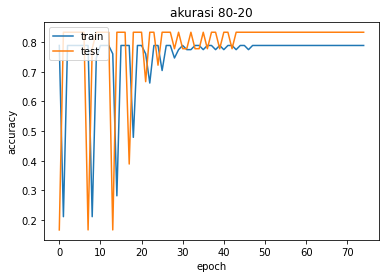

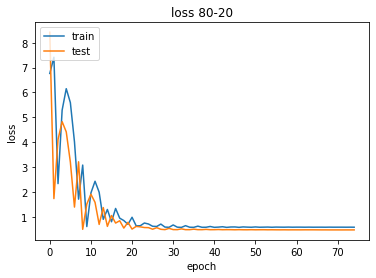

In [17]:
import matplotlib.pyplot as plt

#history 80-20
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('akurasi 80-20')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss 80-20')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

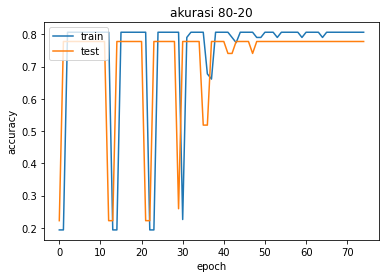

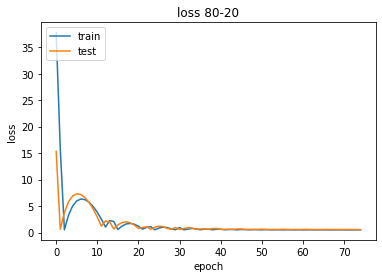

In [18]:
#history 70-30
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('akurasi 80-20')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('loss 80-20')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
!pip install tensorflowjs
import time
saved_model_path = "./{}.h5".format(int(time.time()))
model.save('skenario1')
reloaded_model = tf.keras.models.load_model('skenario1')

model.save(saved_model_path)

Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.


INFO:tensorflow:Assets written to: skenario1/assets


INFO:tensorflow:Assets written to: skenario1/assets


In [40]:
#contoh prediksi


sample = {
    "TE" : 25,
    "HU" : 82,
    "RF" : 6,
    "WS" : 1,
    "PD" : 800,
    "ABJ": 85
}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
prediction = reloaded_model.predict(input_dict)
prediction.round()


Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.


array([[0.]], dtype=float32)